# Practical examples on clustering techniques

**Exercise session held on May 27, 2017.**


----

## Graphics and plotting

In [5]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# general graphics settings
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16, 9)

----

The goal is to compare the performances of a partitioning algorithm against a density-based clustering method. In particular we will see in details two methods: the k-mean and Density-Peaks clustering algorithms (discussed in class). 
Examples of real-world data set can be taken from the [UCI Machine Learning Repository][1]. The dataset investigated can be downloaded at [Artificial datasets][2]. 

[1]: http://archive.ics.uci.edu/ml
[2]: http://cs.uef.fi/sipu/datasets/


# k-Means Algorithm

In the following we will assign a cluster label on each data point by means of k-mean clustering algorithm. K-means is a clustering method that aims to find the position of the centroids that minimize the square of the distance from the data points to the centroid.

Outline of the exercise:
 * Program from scratch the clustering algorithm k-means
 * Download the data set [Aggregation][3]
 * Apply the algorithm with k=7 and plot the final assignation.

[3]: http://cs.uef.fi/sipu/datasets/


a) Read the data set Aggregation and decide the number of clusters: 


In [6]:
# Import the NumPy package for numerical routines 
# and the random package for rundom number generation. 
import numpy as np 
import random as rand 

data = np.genfromtxt('Aggregation.txt')
npoints = len(data[:,0])

x = data[:,0]
y = data[:,1]

k = 7

b) Initialize the position of the centroids:

Random centroids (set the positions of the k centroids to k observations chosen randomly from the dataset).


In [7]:
C_x = np.zeros(k)
C_y = np.zeros(k)
i_C = np.zeros(npoints)

# Random centroids
for r in range(k):
    index = rand.randrange(npoints)
    while(i_C[index]!=0):
        index = rand.randrange(npoints)
    C_x[r] = x[index]
    C_y[r] = y[index]
    i_C[index] = 1


c) Assign each point to the closest centroid and update the position of the centroids to the mean of all data points belonging to the cluster. Repeat until convergence:


In [8]:
C_new = np.zeros(npoints, dtype = int)
distance = np.zeros(k)
N_iter = 0.0
iterate = True

while(iterate):
    N_iter += 1
    iterate = False
    # assign each point to the same cluster of the closest centroid
    for n in range(npoints):
        C_old = C_new[n]     
        # - find the cluster of the closest centroid (Euclidean distance)
        # - update C_new[n] 
        for j in range(k):
            distance[j] = np.sqrt( (x[n]-C_x[j])**2 + (y[n]-C_y[j])**2 )
        C_new[n] = np.argmin(distance)

        if(C_new[n] != C_old ):
               iterate = True

    # update the centroid position
    for i in range(k):
        N_i = 0
        C_x[i] = 0.0
        C_y[i] = 0.0        
        # - each coordinate is the arithmetic mean of the coordinates of all the points in cluster i
        for m in range(npoints):
            if(C_new[m] == i):
                    C_x[i] += x[m]
                    C_y[i] += y[m]
                    N_i += 1
        C_x[i] = C_x[i] / N_i
        C_y[i] = C_y[i] / N_i

print (N_iter)


9.0


d) Compute the Objective function as the sum of squared distances of each point to the centroid of the cluster to which has been assigned:


In [5]:
# Objective function
Obj = 0.0
for i in range(k):
     for n in range(npoints):
        if(C_new[n] == i):
             Obj += ((x[n]-C_x[i])**2 + (y[n]-C_y[i])**2 )

print  (Obj)


12098.0811311


e) Print the final partition to file:


In [6]:
# Output to file
with open('cluster.dat', 'w') as f:
     for i in range(npoints):
         f.write("%f %f %d\n" % (x[i], y[i], C_new[i]))


f) Plot the final clustering result:

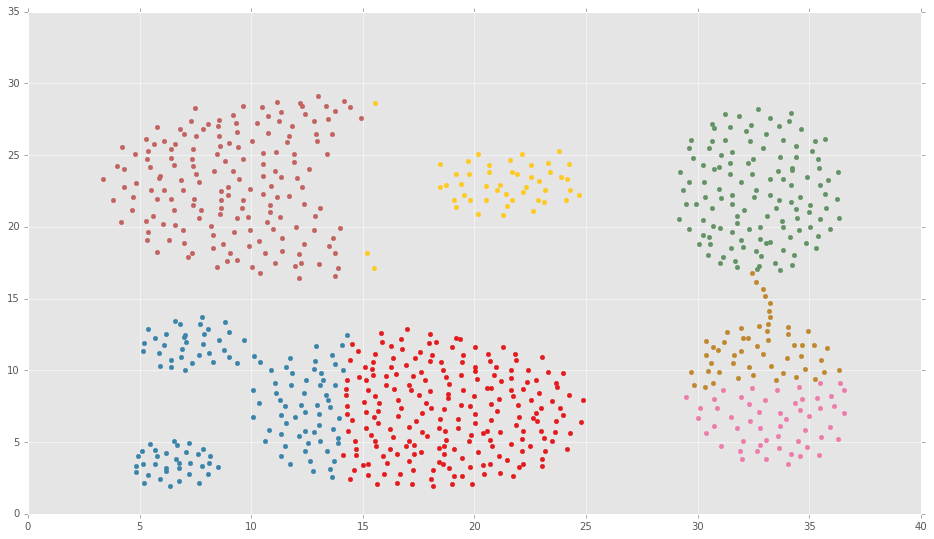

In [7]:
# color each point depending on the assigned cluster

color_list = plt.cm.Set1(np.linspace(0, 1, k+1))

for c in np.unique(C_new):
    cluster = (C_new == c)
    plt.scatter(x[cluster], y[cluster], color=color_list[c])

If you repeat the algorithm many times (i.e. 100 times), the result that minimizes the intra-cluster variance (minimum Objective function) corresponds to the best assignation. How does the final partition for the best case looks like?


(Optional) Perform the Scree Plot (with k from 2 to 20) for this data set using the best value of the Objective function found after running a large number of iterations.
The Scree Plot is an empirical way to find the best number of clusters.

# Density Peaks Algorithm

The basic idea is that cluster centers are characterized by a higher density than their neighbors and by a relatively large distance from points with higher densities.
Clusters are recognized regardless of their shape.

Outline of the exercise:

 * Program from scratch the density peaks algorithm
 * Apply the algorithm with dc=2.3
 * Plot the clustering result and compare it to the one previously obtained by the k-means algorithm.


a) Read the data set Aggregation and set the number of the cutoff distance dc that will be used to define a neighborhood region around each point: 


In [8]:
data = np.loadtxt('Aggregation.txt')
npoints = data.shape[0]
x = data[:,0]
y = data[:,1]

dc = 2.3
DcSquared = dc*dc


b) Compute the local density of each  data point i as the number of points that are closer than dc to the point i: 


In [9]:
Density = np.zeros(npoints)
Delta = np.zeros(npoints)
Dmax = 0.

# compute densities
for i in np.arange(npoints):
    for j in np.arange(i+1, npoints):
        d = ((x[i]-x[j])**2+(y[i]-y[j])**2)

        # - if d is less than DcSquared, increment Density[i] and Density[j] by 1
        if d <= DcSquared:
            Density[i] += 1
            Density[j] += 1
        if d > Dmax:
            Dmax = d

SortedDensity = Density.argsort()[::-1]


c) Calculate Delta for each point i by computing the minimum distance between the point i and any other point with higher density: 


In [10]:
# compute Delta as the distance from the point of higher density
NearestDense = np.zeros(npoints, dtype = int)

# Note: we loop over points ordered for decreasing density
for i in np.arange(1, npoints):
    dmin = Dmax
    NearestIndex = 0
    for j in np.arange(i):
        dtmp = ((x[SortedDensity[i]]-x[SortedDensity[j]])**2+(y[SortedDensity[i]]-y[SortedDensity[j]])**2)
        if dtmp <= dmin:
            dmin = dtmp
            NearestIndex = j

    Delta[i] = np.sqrt(dmin)
    NearestDense[i] = NearestIndex

# set an arbitrary Delta for the densiest point in the data set
Delta[0] = Delta.max()*1.1


Note that Delta is much larger than the typical nearest neighbor distance only for points that are local or global maxima in the density.

d) Plot Delta as a function of the density for each point, known as Decision Graph:


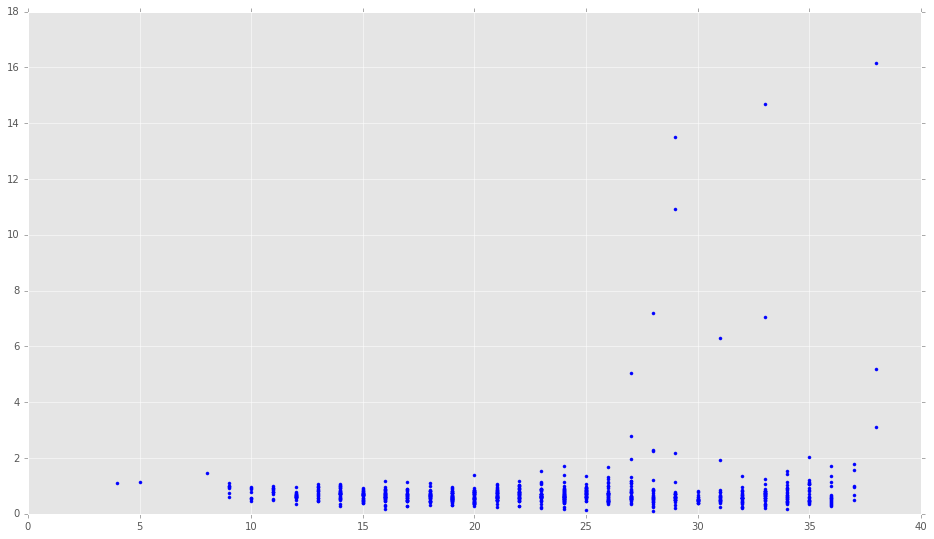

In [11]:
# plot the Decision-Graph: Density VS Delta
plt.figure()
for i in range(npoints):
    plt.plot(Density[SortedDensity[i]], Delta[i], 'b.')
plt.show()


e) Cluster centers are recognized as points for which the value of Delta is large and relatively high density: 


In [12]:
# take the cut values for the Density and Delta to select centers
RhoTh = 25.
DeltaTh = 6.

Centers = np.where(np.logical_and((Delta >= DeltaTh),(np.sort(Density)[::-1] >= RhoTh)))
print(data[SortedDensity[Centers]])
print(Density[SortedDensity[Centers]])
print(Delta[Centers])
NCenters = len(data[SortedDensity[Centers]])
print(NCenters)


[[ 18.65   4.75   4.  ]
 [ 31.95  19.1    6.  ]
 [  6.75   3.2    5.  ]
 [  7.1   11.95   7.  ]
 [  7.4   25.45   2.  ]
 [ 21.    22.6    1.  ]
 [ 32.95  11.15   3.  ]]
[ 38.  33.  33.  31.  29.  29.  28.]
[ 16.14013398  14.67284908   7.04343666   6.30971473  13.50333292
  10.90802457   7.20850192]
7


f) After the cluster centers have been found, each remaining point is assigned to the same cluster as its nearest neighbor of higher density: 


In [13]:
# assign points to clusters in the order of sorted density
# assign the centers first
Assign = np.zeros(npoints, dtype = int)
for j in range(NCenters):
    Assign[SortedDensity[Centers[0][j]]] = j + 1

# assing to the point of highest density among those already assigned
for j in np.arange(npoints):
    if Assign[SortedDensity[j]] < 1:
        Assign[SortedDensity[j]] = Assign[SortedDensity[NearestDense[j]]]

# output to file
with open('cluster_DP.dat', 'w') as f:
    for i in range(npoints):
        f.write("%f %f %d\n" % (x[i], y[i], Assign[i]))


Note that the cluster assignment is performed in a single step: no Objective function is optimezed iteratively. 

g) Plot the final clustering results:


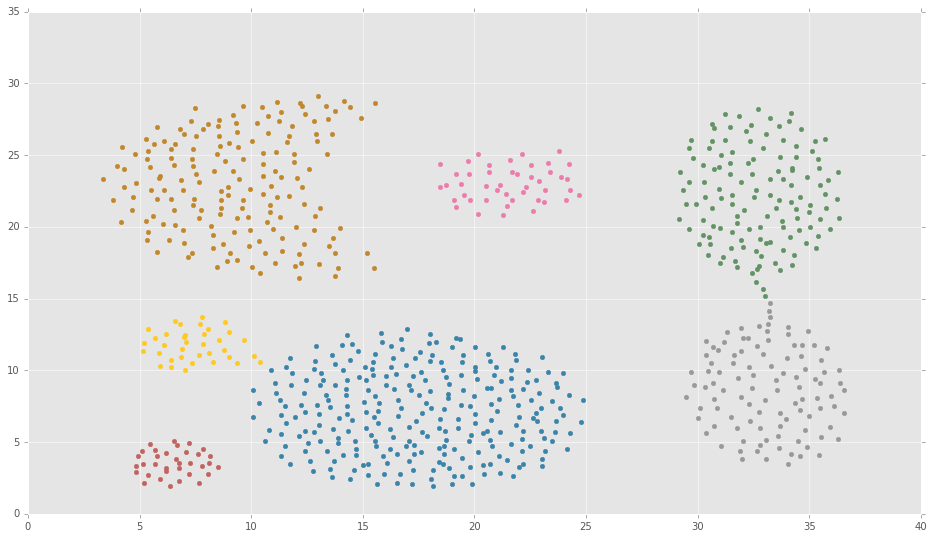

In [14]:
# color each point depending on the assigned cluster

color_list = plt.cm.Set1(np.linspace(0, 1, NCenters+1))

for c in np.unique(Assign):
    cluster = (Assign == c)
    plt.scatter(x[cluster], y[cluster], color=color_list[c])

# Clustering evaluation

We will use the Normalized Mutual Information scores for the two algorithms to compare their clustering result against the known ground truth classification.
It is based on the concept of entropy as a measure of uncertainty associated to a clustering partition or ground truth classification.
Using the formula shown in the theoretical part of the lesson we find:

NMI for k-mean result: 0.84

NMI for Density Peaks result: 0.99


In [15]:
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI

# NMI for k-mean result C_new:
NMI(data[:,2],C_new)

0.84964046681213434

In [16]:
# NMI for Density Peaks result Assign:
NMI(data[:,2],Assign)

0.98839767516668942